In [1]:
#Solving MNIST using tensorflow keras and a simple neural network

In [4]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 MB 3.0 MB/s eta 0:00:0000:0100:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 8.8 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.7/961.7 kB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2

In [6]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 4.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Import all the modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [8]:
#Load the dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
#Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
#Reshape the data
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

In [11]:
#Do one hot encoding on the labels
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [12]:
#Create a CNN model using the sequential API
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

2022-08-31 16:38:41.004290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
#Train the model and save the history. Use a validation split of 0.2
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.2973 - accuracy: 0.9161 - val_loss: 0.1515 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1214 - accuracy: 0.9640 - val_loss: 0.1080 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0793 - accuracy: 0.9778 - val_loss: 0.0977 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0816 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0421 - accuracy: 0.9878 - val_loss: 0.0779 - val_accuracy: 0.9765
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.0836 - val_accuracy: 0.9762
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0221 - accuracy: 0.9942 - val_loss: 0.0724 - val_accuracy: 0.9789

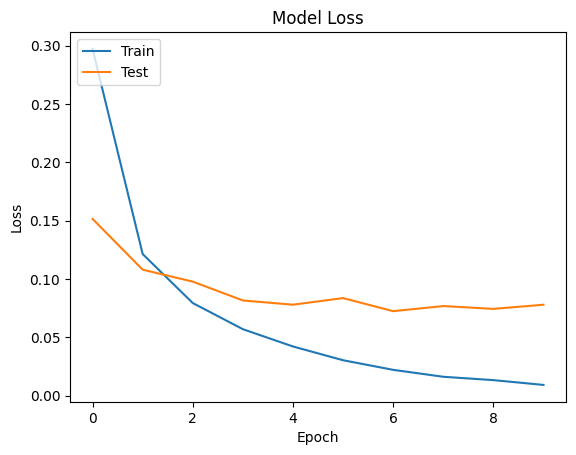

In [15]:
#Render the history. Use loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
#Evaluate the model. Use the test data.
model.evaluate(test_images, test_labels)
print("Loss: ", model.evaluate(test_images, test_labels)[0])
print("Accuracy: ", model.evaluate(test_images, test_labels)[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9799
Loss:  0.06966006755828857
313/313 [==============================] - 2s 6ms/step - loss: 0.0697 - accuracy: 0.9799
Accuracy:  0.9799000024795532
